## Imports

In [1]:
import pandas as pd
import numpy as np
import requests
import os
from matplotlib import pyplot as plt

Read in Congressional Elections Dataset

In [2]:
election_df = pd.read_csv("dime_cong_elections_current.csv")
election_df[:5]

,cycle,bonica_rid,bonica_rid_cycle,ICPSR,ICPSR2,recipient_candid,recipient_fecid,Name,party,state,...,gwinner,candStatus,num_prim_opps,id,pp1,dem_pres_vs,candidate_inactive,num_distinct_donors_all_donors,distcyc,cpscore
0,2018,cand147233,cand147233_2018,S8WY002212018,S8WY00221,S8WY00221,S8WY00221,"VAN RISSEGHEM, ANTHONY L",R,WY,...,NaN,N,4,2018_WY,cand147233_2018_WY_S_R,0.243,NaN,0,2018_WY_S,NaN
1,2018,cand147232,cand147232_2018,S8WY002132018,S8WY00213,S8WY00213,S8WY00213,"HOLTZ, JOHN",R,WY,...,NaN,N,4,2018_WY,cand147232_2018_WY_S_R,0.243,NaN,0,2018_WY_S,NaN
2,2018,cand148259,cand148259_2018,S4WY000972018,S4WY00097,S4WY00097,C00554758,"HARDY, CHARLES E",R,WY,...,NaN,C,4,2018_WY,cand148259_2018_WY_S_R,0.243,NaN,59,2018_WY_S,NaN
3,2018,cand147231,cand147231_2018,S8WY002052018,S8WY00205,S8WY00205,S8WY00205,"DE LA FUENTE, ROQUE ROCKY",D,WY,...,NaN,N,2,2018_WY,cand147231_2018_WY_S_D,0.243,NaN,0,2018_WY_S,NaN
4,2018,cand146718,cand146718_2018,H8WY001712018,H8WY00171,H8WY00171,H8WY00171,"MILLER, ROD",R,WY,...,NaN,N,3,2018_WY,cand146718_2018_WY_01_R,0.337,NaN,0,2018_WY_1,NaN


In [3]:
election_df.describe()

,cycle,recipient_cfscore,contributor_cfscore,dwnom1,num_distinct_donors,total_receipts,contribs_from_candidate,total_pac_contribs,unitemized,total_indiv_contrib,total_disbursements,ppct,gpct,num_prim_opps,dem_pres_vs,candidate_inactive,num_distinct_donors_all_donors,cpscore
count,48498.000000,29354.000000,13119.000000,10279.000000,29377.000000,4.849800e+04,4.849800e+04,4.849800e+04,4.849800e+04,4.849800e+04,4.849800e+04,29872.000000,21855.000000,48498.000000,48268.000000,44792.000000,48498.000000,0.0
mean,2000.750299,0.097597,0.095347,0.017268,1230.987643,4.156802e+05,1.227825e+04,9.934959e+04,6.585737e+04,2.145548e+05,4.019520e+05,0.498940,0.374487,3.767248,0.509839,0.001540,1175.003258,NaN
std,11.786922,1.071405,1.182229,0.404125,4179.404530,1.578401e+06,3.508799e+05,2.802157e+05,4.243315e+05,8.714632e+05,1.547223e+06,0.398579,0.276518,3.312979,0.135932,0.039219,5775.496984,NaN
min,1980.000000,-4.987000,-4.677000,-0.776000,0.000000,-1.000000e+04,-3.037300e+04,-1.650000e+04,-6.147910e+05,-7.281600e+04,-1.000000e+04,0.000000,0.001000,1.000000,0.170000,0.000000,0.000000,NaN
25%,1992.000000,-0.791000,-0.974000,-0.352000,11.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.107000,0.056000,2.000000,0.414000,0.000000,0.000000,NaN
50%,2002.000000,0.217000,0.294000,-0.058000,126.000000,1.529900e+04,0.000000e+00,0.000000e+00,1.415000e+03,5.250000e+03,1.481800e+04,0.418000,0.380000,3.000000,0.491000,0.000000,11.000000,NaN
75%,2012.000000,0.994000,1.099000,0.386000,1213.000000,2.802362e+05,0.000000e+00,2.550000e+04,3.559546e+04,1.311995e+05,2.681112e+05,1.000000,0.595108,5.000000,0.585000,0.000000,532.000000,NaN
max,2018.000000,4.312000,5.054000,1.000000,201786.000000,7.024300e+07,5.102823e+07,4.368642e+06,3.188267e+07,3.813849e+07,6.649625e+07,1.000000,1.000000,29.000000,1.000000,1.000000,289496.000000,NaN


In [84]:
filtered_df = election_df[election_df.candidate_inactive == 0]
print("Total active candidates: ", len(filtered_df))
filtered_df = filtered_df[filtered_df.seat == "federal:house"]
print("Total House candidates: ", len(filtered_df))
filtered_df = filtered_df[filtered_df.cycle == 2018]
print("2018 House candidates: ", len(filtered_df))


Total active candidates:  44723
Total House candidates:  38725
2018 House candidates:  2943


In [85]:
incumbents = filtered_df[filtered_df.Incum_Chall == "I"]
len(incumbents)

368

In [86]:
final_df = filtered_df[filtered_df.party == "D"]
print("2018 Democratic House candidates:",len(final_df))
final_df = final_df[final_df.num_prim_opps >= 6]
print("2018 Democratic House candidates in primaries with at least 6 candidates:",len(final_df))
final_df = final_df[~final_df.district.isin(incumbents.district)]
print("2018 Democratic House candidates in primaries with at least 6 candidates and no incumbent:",len(final_df))
final_df = final_df[final_df.total_receipts >= 5000]
print("2018 Democratic House candidates in primaries with at least 6 candidates and no incumbent who raised above reporting threshold:",len(final_df))

2018 Democratic House candidates: 1559
2018 Democratic House candidates in primaries with at least 6 candidates: 728
2018 Democratic House candidates in primaries with at least 6 candidates and no incumbent: 344
2018 Democratic House candidates in primaries with at least 6 candidates and no incumbent who raised above reporting threshold: 234


In [87]:
final_df.sort_values("dcp",inplace=True)

In [88]:
election_df[election_df.dcp == "2018_IN_09_D"][["Incum_Chall", "Name", "ppct"]]

,Incum_Chall,Name,ppct
2562,C,"LEINEWEBER, JASON",NaN
2563,C,"CHATLOS, ROBERT",NaN
2564,C,"HOOD, BRANDON WESLEY MR.",NaN
2565,C,"CURTIS, TOD",NaN
2566,C,"CANON, DANIEL J",NaN
2567,C,"WATSON, LIZ",NaN


In [14]:
# Testing code:
incumbents;

In [15]:
# Testing code:
incumbents[["Name","state","district","dcp"]];
#incumbents.loc[3628]

## Read in financial disclosure form log

In [3]:
df_disclosures_2018 = pd.read_csv("2018FD.txt", delimiter="\t")
df_disclosures_2017 = pd.read_csv("2017FD.txt", delimiter="\t")
df_disclosures = pd.concat([df_disclosures_2018,df_disclosures_2017])
df_disclosures = df_disclosures.astype({"DocID": np.int32})
# We only want initial filings (probably)
df_disclosures = df_disclosures[df_disclosures["FilingType"] == "C"]
df_disclosures.head()

,Prefix,Last,First,Suffix,FilingType,StateDst,Year,FilingDate,DocID
0,NaN,Corlew,Bob,NaN,C,TN06,2018,5/3/2018,10020622
1,NaN,Abel,Kevin,NaN,C,GA06,2018,5/15/2018,10022395
5,NaN,Accavitti,Frank,Jr,C,MI10,2018,6/12/2018,10023933
6,NaN,Achille,Carl H.,NaN,C,NY05,2018,5/23/2018,10022683
8,NaN,Adadi,Elizabeth,NaN,C,FL27,2018,5/15/2018,10023153


In [90]:
# Get matching last name fields
final_df["last"] = final_df.Name.str.split(",",1).str[0]
df_disclosures["last"] = df_disclosures.Last.str.upper()

In [91]:
new_df = pd.merge(final_df, df_disclosures,  how='left', left_on=['last','district'], right_on = ['last','StateDst'])

In [94]:
new_df[["Name", "Last", "district","StateDst","DocID", "Year", "FilingType", "FilingDate"]].head()

,Name,Last,district,StateDst,DocID,Year,FilingType,FilingDate
0,"KIRKPATRICK, ANN",Kirkpatrick,AZ02,AZ02,10021118.0,2018.0,C,4/29/2018
1,"KIRKPATRICK, ANN",Kirkpatrick,AZ02,AZ02,10019248.0,2017.0,C,10/30/2017
2,"YUKSEL, YAHYA",Yuksel,AZ02,AZ02,10022110.0,2018.0,C,5/15/2018
3,"SHERRY, BARBARA LOUISE",Sherry,AZ02,AZ02,10021943.0,2018.0,C,5/8/2018
4,"SHERRY, BARBARA LOUISE",Sherry,AZ02,AZ02,10019362.0,2017.0,C,11/11/2017


In [20]:
# TODO: California primary elections have some filing in 2016??
# In general, we want to be able to find everyone who raised over $5000. 
# But for now we'll just drop the bad ones.
new_df = new_df[new_df.total_receipts >= 5000]
new_df = new_df.dropna(subset=["DocID"])

In [21]:
# Some people have two filings, one in 2017 and one in 2018. Keep the 2017 one.
new_df.sort_values(["dcp", "Year"], inplace=True)
new_df.drop_duplicates(subset=["Name","dcp"], inplace=True)

In [23]:
# Texas's 29th distrinct has 2 Garcias, so their data gets mixed up. Just drop it for now.
new_df = new_df[new_df.district != "TX29"]

In [24]:
new_df = new_df.astype({"DocID": np.int32, "Year" : np.int32})

for index, row in new_df.head().iterrows():
    print('http://clerk.house.gov/public_disc/financial-pdfs/{0}/{1}.pdf'.format(row.Year, row.DocID))

http://clerk.house.gov/public_disc/financial-pdfs/2017/10019248.pdf
http://clerk.house.gov/public_disc/financial-pdfs/2017/10019362.pdf
http://clerk.house.gov/public_disc/financial-pdfs/2017/10018167.pdf
http://clerk.house.gov/public_disc/financial-pdfs/2017/9111101.pdf
http://clerk.house.gov/public_disc/financial-pdfs/2017/9111639.pdf


## Download the disclosure files

In [226]:
url_format='http://clerk.house.gov/public_disc/financial-pdfs/{0}/{1}.pdf'
if not os.path.exists("../data"):
     os.makedirs("../data")
if not os.path.exists("../data/raw_disclosures"):
     os.makedirs("../data/raw_disclosures")

for index, row in new_df.iterrows():
    url = url_format.format(row.Year, row.DocID)
    dst = '../data/raw_disclosures/{0}.pdf'.format(row.DocID)
    if not os.path.exists(dst):
        r = requests.get(url, stream=True)
        with open(dst, 'wb') as f:
            f.write(r.content)

## Parse disclosure files:

In [1]:
import os
os.system('cd ../house-pfd-parser && npm start') # && cd -

1

In [1]:
os.listdir('../data/parsed_disclosures')

NameError: name 'os' is not defined

In [167]:
import pandas as pd
earned_income = pd.read_csv('../data/parsed_disclosures/earned-income.csv')
assets = pd.read_csv('../data/parsed_disclosures/assets-and-unearned-income.csv')
assets.rename(columns={"income.1": "income_prev_year"}, inplace=True)
liabilities = pd.read_csv('../data/parsed_disclosures/liabilities.csv')

# There's one on 10018705, one on 10019048 that cross over lines and aren't merged 
# because the asset name hits both lines.
# Since we don't care about the full asset name, and the correct value is in another
# row, we simply drop the rows we've verified.
assets = assets[~(assets.file.isin(['10018705', '10019048']) & (assets['value-of-asset'].isna()))]

In [168]:
range_map = {}
range_map['Undetermined'] = (0, 0)
range_map['None'] = (0, 0)

# Asset classifications
range_map['$1 - $1,000'] = (1, 1000)
range_map['$1,001 - $15,000'] = (1001, 15000)
range_map['$15,001 - $50,000'] = (15001, 50000)
range_map['$50,001 - $100,000'] = (50001, 100000)
range_map['$10,000 - $15,000'] = (10000, 15000)
range_map['$100,001 - $250,000'] = (100001, 250000)
range_map['$250,001 - $500,000'] = (250001, 500000)
range_map['Over $50,000,000'] = (50000000, 50000000)
range_map['Spouse/DC over $1,000,000'] = (1000000, 1000000)

# Because one guy reported exact numbers instead of ranges
range_map['$4,100.00'] = (4100, 4100)
range_map['$83,000.00'] = (83000, 83000)


# Liability classifications
range_map['$500,001 - $1,000,000'] = (500001, 1000000)
range_map['$1,000,001 - $5,000,000'] = (1000001, 5000000)
range_map['$5,000,001 - $25,000,000'] = (5000001, 25000000)
range_map['$25,000,001 - $50,000,000'] = (25000001, 50000000)

# Unearned income classifications
range_map['$1 - $200'] = (1, 200)
range_map['$201 - $1,000'] = (201, 1001)
range_map['$1,001 - $2,500'] = (1001, 2500)
range_map['$2,501 - $5,000'] = (2500, 5000)
range_map['$5,001 - $15,000'] = (5001, 15000)
range_map['$15,001 - $50,000'] = (15001, 50000)
range_map['$100,001 - $1,000,000'] = (100001, 1000000)
range_map['Over $5,000,000'] = (5000000, 5000000)

# Parse ranges for assets and liabilities
for (string_range, values) in range_map.items():
    liabilities.loc[liabilities['amount-of-liability'] == string_range,'min_liability'] = values[0]
    liabilities.loc[liabilities['amount-of-liability'] == string_range,'max_liability'] = values[1]
    assets.loc[assets['value-of-asset'] == string_range,'min_asset'] = values[0]
    assets.loc[assets['value-of-asset'] == string_range,'max_asset'] = values[1]

# Parse ranges for unearned income
liabilities.drop(liabilities[liabilities.file.str.contains("None disclosed")].index, inplace=True)
assets.drop(assets[assets.file.str.contains("None disclosed")].index, inplace=True)
earned_income.drop(earned_income[earned_income.file.str.contains("None disclosed")].index, inplace=True)
# assets.loc[assets['income_prev_year'].isna(), 'min_unearned_income'] = 0
# assets.loc[assets['income_prev_year'].isna(), 'max_unearned_income'] = 0    
# for (string_range, values) in range_map.items():
#     assets.loc[assets['income_prev_year'] == string_range,'min_unearned_income'] = values[0]
#     assets.loc[assets['income_prev_year'] == string_range,'max_unearned_income'] = values[1]



# Parse earned income data
earned_income[['income_ytd', 'income_prev_year']] = earned_income.amount.str.split(" ", n=1, expand=True)

In [169]:
def parse_unearned_income(row):
    # First check previous year's income
    if (row['income_prev_year'] in range_map):
        values = range_map[row['income_prev_year']]
        row['min_unearned_income'] = values[0]
        row['max_unearned_income'] = values[1]
    # If that's not available, try the current year
    elif (row['income'] in range_map):
        values = range_map[row['income']]
        row['min_unearned_income'] = values[0]
        row['max_unearned_income'] = values[1]
    # No value in either; so it's just zero.
    elif (pd.isna(row['income']) and pd.isna(row['income_prev_year'])):
        row['min_unearned_income'] = 0
        row['max_unearned_income'] = 0
    # Sometimes the two rows will be combined and we need to split them.
    elif row['income'] == row['income_prev_year']:
        tokens = row['income_prev_year'].split();
        if (len(tokens) == 6 and tokens[1] == '-' and tokens[4] == '-'):
            # (hopefully) looks something like '$2,501 - $5,000 $5,001 - $15,000'
            key = ' '.join(row['income_prev_year'].split(' ')[3:])
            values = range_map[key]
            row['min_unearned_income'] = values[0]
            row['max_unearned_income'] = values[1]
        elif ('None' in tokens):
            # (hopefully) looks something like '$2,501 - None $15,000' or 'None None'
            key = ' '.join(list(filter(lambda x: x != 'None', tokens)))
            if key in range_map:
                values = range_map[key]
            elif key == '':
                values = (0,0)
            row['min_unearned_income'] = values[0]
            row['max_unearned_income'] = values[1]
        elif (len(tokens) == 6 and tokens[1] == '-' and tokens[3] == '-'):
            # If the row entries spill over onto two lines,
            # they'll still be read left-to-right, so
            # $50,001 -            $15,001 -
            # $100,000             $50,000
            # gets picked up as '$50,001 - $15,001 - $100,000 $50,000'.
            # We just take previous year, which is 2,5 (the right column)
            key = '{} - {}'.format(tokens[2], tokens[5])
            values = range_map[key]
            row['min_unearned_income'] = values[0]
            row['max_unearned_income'] = values[1]
        else: 
            print("Not processed!", row['income'], " ; ", row['income_prev_year'])
    # The previous check should've gotten them all
    else:
        print("Should not be!", row['income'], " ; ", row['income_prev_year'])
    return row;
        
assets = assets.apply(parse_unearned_income, axis=1)

In [104]:
y = '$2,501 - $5,000 $5,001 - $15,000'
x = '$2,501 - None $5,000'
z = '$50,001 - $15,001 - $100,000 $50,000'
[z.split(' ')[i] for i in [2,3,5]]


['$15,001', '-', '$50,000']

In [110]:
liabilities[liabilities.min_liability.isna()]
#assets[assets.min_asset.isna()]
#print(assets[assets.min_unearned_income.isna()][['file','page','asset','income','income_prev_year']])

# TODO: ~120 misconfigured ones



,file,page,owner,creditor,date-incurred,type,amount-of-liability,min_liability,max_liability


In [170]:
assert(assets.min_unearned_income.isna().sum() == 0)
assert(assets.max_unearned_income.isna().sum() == 0)
assert(assets.min_asset.isna().sum() == 0)
assert(assets.max_asset.isna().sum() == 0)

assert(liabilities.min_liability.isna().sum() == 0)
assert(liabilities.max_liability.isna().sum() == 0)

In [171]:
def parse_income(row):
    # There is income reported, but one or both dollar value might be empty:
    if row['income_prev_year'] in ['N/A', 'N/a'] or row['income_prev_year'] is None:
        # either prev year income is explicitly N/A, or one of the two fields is blank.
        # In either case, just use the other one.
        income = row['income_ytd']
    else:
        income = row['income_prev_year']
    try:
        if income in ['N/A', 'N/a']:
            row['income_earned'] = 0
        else:
            row['income_earned'] = float(income.replace("$","").replace(",",""))
    except (AttributeError, ValueError):
        row['income_earned'] = -1
        print("failed to parse income:", row['file'], row['income_prev_year'], row['income_ytd'])
    return row

In [172]:
earned_income = earned_income.apply(parse_income, axis=1)

In [173]:
assert(earned_income.income_earned.isna().sum() == 0)

In [174]:
earned_income[['file','income_earned']].groupby('file').sum()

,income_earned
file,
10014474,164929.40
10014492,34975.00
10014571,122289.00
10014645,86739.00
10014736,196323.94
10015308,35251.00
10015407,418530.00
10015425,80434.00
10015728,243291.00


In [179]:
assets_by_file = assets[['file', 'min_asset', 'max_asset', 'min_unearned_income', 'max_unearned_income']].groupby('file').sum()
liabilities_by_file = liabilities[['file','min_liability','max_liability']].groupby('file').sum()
earned_income_by_file = earned_income[['file','income_earned']].groupby('file').sum()
df_pfd = liabilities_by_file.join(assets_by_file, how='outer').join(earned_income_by_file, how='outer')
# Fill in na's generated by outer join
df_pfd.fillna(0, inplace=True)

In [185]:
type(df_pfd.iloc[0])

pandas.core.series.Series

In [180]:
df_pfd['min_wealth'] = df_pfd['min_asset'] - df_pfd['max_liability']
df_pfd['max_wealth'] = df_pfd['max_asset'] - df_pfd['min_liability']
df_pfd['wealth'] = (df_pfd['min_wealth'] + df_pfd['max_wealth']) / 2
df_pfd['income'] = df_pfd['income_earned'] + (df_pfd['min_unearned_income'] + df_pfd['max_unearned_income']) / 2
df_pfd

,min_liability,max_liability,min_asset,max_asset,min_unearned_income,max_unearned_income,income_earned,min_wealth,max_wealth,wealth,income
file,,,,,,,,,,,
10014474,250001.0,500000.0,150010.0,476000.0,20204.0,66201.0,164929.40,-349990.0,225999.0,-61995.5,208131.90
10014492,15001.0,50000.0,1747036.0,4080000.0,21824.0,58309.0,34975.00,1697036.0,4064999.0,2881017.5,75041.50
10014571,10000.0,15000.0,202013.0,555000.0,209.0,2601.0,122289.00,187013.0,545000.0,366006.5,123694.00
10014645,130003.0,350000.0,19005.0,110000.0,0.0,0.0,86739.00,-330995.0,-20003.0,-175499.0,86739.00
10014736,465004.0,1050000.0,254005.0,560000.0,2500.0,5000.0,196323.94,-795995.0,94996.0,-350499.5,200073.94
10014954,350002.0,750000.0,434011.0,1012000.0,16010.0,55805.0,0.00,-315989.0,661998.0,173004.5,35907.50
10015308,15001.0,50000.0,0.0,0.0,2500.0,5000.0,35251.00,-50000.0,-15001.0,-32500.5,39001.00
10015407,300002.0,600000.0,767043.0,2105000.0,20037.0,72000.0,418530.00,167043.0,1804998.0,986020.5,464548.50
10015425,120001.0,280000.0,59021.0,364000.0,2208.0,7001.0,80434.00,-220979.0,243999.0,11510.0,85038.50


In [181]:
df_pfd.dtypes

min_liability          float64
max_liability          float64
min_asset              float64
max_asset              float64
min_unearned_income    float64
max_unearned_income    float64
income_earned          float64
min_wealth             float64
max_wealth             float64
wealth                 float64
income                 float64
dtype: object

## Manual inspection code

In [25]:
len(new_df)

182

In [26]:
new_df[new_df.district=="MI13"][["Name", "Last", "district","StateDst","DocID", "Year", "FilingType", "FilingDate","total_receipts"]]

,Name,Last,district,StateDst,DocID,Year,FilingType,FilingDate,total_receipts
151,"GILMORE, MICHAEL",GILMORE,MI13,MI13,9111544,2017,C,8/7/2017,37492.85
144,"HILL KNOTT, KIMBERLY",HILL KNOTT,MI13,MI13,10023767,2018,C,6/7/2018,19108.00
145,"YOUNG, COLEMAN ALEXANDER MR. II",YOUNG,MI13,MI13,10022515,2018,C,5/13/2018,30958.00
146,"CONYERS, IAN",CONYERS,MI13,MI13,10024207,2018,C,7/18/2018,212367.24
147,"WILD, WILLIAM R.",WILD,MI13,MI13,10024034,2018,C,7/5/2018,622058.00
148,"JONES, BRENDA",JONES,MI13,MI13,9113119,2018,C,5/23/2018,265137.10
152,"TLAIB, RASHIDA",TLAIB,MI13,MI13,10022443,2018,C,5/16/2018,1509736.20


In [234]:
new_df[["district","Last","DocID","total_receipts"]].to_csv("inspection2.csv")

In [232]:
new_df.columns

Index(['cycle', 'bonica_rid', 'bonica_rid_cycle', 'ICPSR', 'ICPSR2',
       'recipient_candid', 'recipient_fecid', 'Name', 'party', 'state',
       'district', 'dcp', 'seat', 'Incum_Chall', 'cand_gender',
       'recipient_cfscore', 'contributor_cfscore', 'dwnom1',
       'num_distinct_donors', 'total_receipts', 'contribs_from_candidate',
       'total_pac_contribs', 'unitemized', 'total_indiv_contrib',
       'total_disbursements', 'ppct', 'pwinner', 'gpct', 'gwinner',
       'candStatus', 'num_prim_opps', 'id', 'pp1', 'dem_pres_vs',
       'candidate_inactive', 'num_distinct_donors_all_donors', 'distcyc',
       'cpscore', 'Last', 'Prefix', 'First', 'Suffix', 'FilingType',
       'StateDst', 'Year', 'FilingDate', 'DocID'],
      dtype='object')

In [103]:
manual = pd.read_csv("manual_finances.csv")
manual.head()

,District,Name,DocID,Receipts,Min asset,Max asset,Min liability,Max liability,Min unearned income,Max unearned income,YTD income,Prior year income
0,AZ02,KIRKPATRICK,10019248.0,4087164.7,1001.0,15000.0,10000.0,15000.0,1.0,200.0,195000.0,195000.0
1,AZ02,KIRKPATRICK,NaN,NaN,15001.0,50000.0,15001.0,50000.0,1.0,200.0,NaN,NaN
2,AZ02,KIRKPATRICK,NaN,NaN,50001.0,100000.0,250001.0,500000.0,1001.0,2500.0,NaN,NaN
3,AZ02,KIRKPATRICK,NaN,NaN,50001.0,100000.0,250001.0,500000.0,1.0,200.0,NaN,NaN
4,AZ02,KIRKPATRICK,NaN,NaN,1001.0,15000.0,NaN,NaN,1001.0,2500.0,NaN,NaN


In [104]:
manual_df = manual.groupby(["District","Name"]).sum()
manual_df.reset_index(inplace=True)
# Filter to only electronic submissions
manual_df = manual_df[manual_df.DocID >= 10000000]

In [105]:
manual_df["min_net"] = manual_df["Min asset"] - manual_df["Max liability"]
manual_df["max_net"] = manual_df["Max asset"] - manual_df["Min liability"]
manual_df["med_net"] = (manual_df["max_net"] + manual_df["min_net"])/ 2
manual_df["med_unearned"] = (manual_df["Min unearned income"] + manual_df["Max unearned income"]) / 2
manual_df["inc_earned"] = manual_df["Prior year income"]
manual_df["income"] = manual_df["inc_earned"] + manual_df["med_unearned"]


In [106]:
manual_df[["District","Name","Receipts","med_net","income"]]
saved = manual_df.copy()
# manual_df = manual_df[manual_df.District == "PA07"]

In [107]:
manual_df[["District","Name","Receipts","med_net","income","DocID"]]


,District,Name,Receipts,med_net,income,DocID
0,AZ02,HEINZ,1013517.34,193501.5,230117.50,10018167.0
1,AZ02,KIRKPATRICK,4087164.70,1092507.0,214007.50,10019248.0
4,AZ02,SHERRY,7318.02,75007.5,25734.75,10019362.0
6,AZ02,YUKSEL,52426.93,-187000.0,3568.00,10022110.0
7,MI13,CONYERS,212367.24,0.0,82000.00,10024207.0
9,MI13,HILL KNOTT,19108.00,65509.5,204369.50,10023767.0
11,MI13,TLAIB,1509736.20,-42998.0,112357.00,10022443.0
12,MI13,WILD,622058.00,1612507.0,300210.00,10024034.0
13,MI13,YOUNG,30958.00,75000.5,66756.00,10022515.0
14,NH01,ANDREWS,102750.57,-67000.0,149933.50,10023557.0


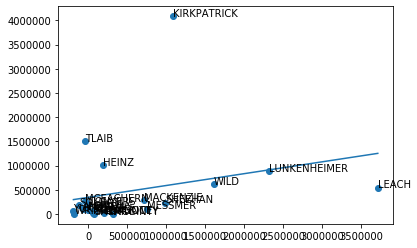

In [108]:
x = manual_df.med_net
y = manual_df.Receipts
plt.scatter(x, y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

for i, txt in enumerate(manual_df.Name):
    plt.annotate(txt, (x.iloc[i], y.iloc[i]))

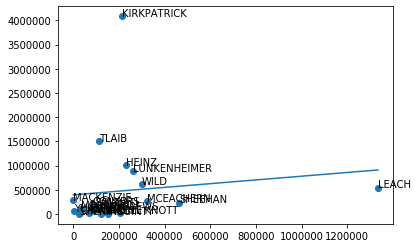

In [109]:
x = manual_df.income
y = manual_df.Receipts
fig = plt.figure()
ax = plt.gca()
ax.scatter(x, y)
ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

for i, txt in enumerate(manual_df.Name):
    ax.annotate(txt, (x.iloc[i], y.iloc[i]))

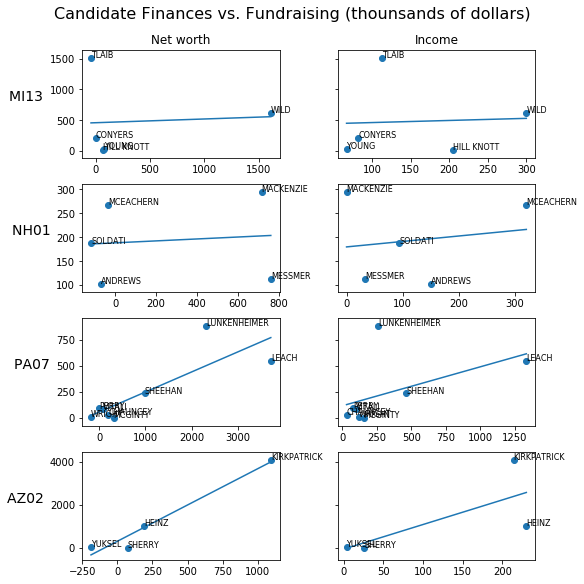

In [110]:
districts = set(manual_df["District"])
fig, axs = plt.subplots(len(districts), 2, sharey='row', constrained_layout=True)
fig.set_size_inches((8, 2 * len(districts)))
i = 0
for district in districts:
    district_df = manual_df[manual_df.District == district]
    x_net_worth = district_df.med_net / 1000
    x_income = district_df.income / 1000
    y = district_df.Receipts / 1000
    
    axs[i, 0].scatter(x_net_worth, y)
    axs[i, 0].plot(np.unique(x_net_worth), np.poly1d(np.polyfit(x_net_worth, y, 1))(np.unique(x_net_worth)))

    axs[i, 1].scatter(x_income, y)
    axs[i, 1].plot(np.unique(x_income), np.poly1d(np.polyfit(x_income, y, 1))(np.unique(x_income)))
    
    for label_idx, txt in enumerate(district_df.Name):
        axs[i, 0].annotate(txt, (x_net_worth.iloc[label_idx], y.iloc[label_idx]), fontsize=8)
        axs[i, 1].annotate(txt, (x_income.iloc[label_idx], y.iloc[label_idx]), fontsize=8)
    
    axs[i, 0].set_ylabel(district + "         ", rotation=0, fontsize=14)
    if (i == 0):
        axs[i,0].set_title("Net worth")
        axs[i,1].set_title("Income")

    i += 1
    
fig.suptitle("Candidate Finances vs. Fundraising (thounsands of dollars)", fontsize=16) ;
plt.show()
#fig.tight_layout()

In [111]:
print(len(manual_df))

22


# Matching candidates by district-name

In [31]:
# Problem: some candidates have multiple entries in this spreadsheet but are (i think) the same person.
# Problem: only matching by district-lastname may incorrectly match people (
#      if last name formatted differently (e.g. "CORBY O NEILL, RUBY" and "Ruby Corby-O'Neill", CT05)
#      or if two different candidates have same last name e.g. "GARCIA, SYLVIA R" and "GARCIA, ROEL", TX29)
# Problem: one candidate may have multiple filings
# what we really need is a crosswalk from a UID on the left to the DocID on the right, then to
# decide which DocID is the one that really matters
elec_df = pd.read_csv("dime_cong_elections_current.csv")
elec_df = elec_df[elec_df.seat == "federal:house"]
elec_df = elec_df[elec_df.cycle == 2018]

In [32]:
elec_df[['Name','district']].head(10)

,Name,district
4,"MILLER, ROD",WY01
5,"STANLEY, BLAKE",WY01
6,"CUMMINGS, DANIEL CLYDE",WY01
7,"HELM, TRAVIS",WY01
8,"HUNTER, GREG",WY01
10,"LUTZ JR, DANIEL P DANNY",WV02
12,"DRIESSEN, KEN",WI07
13,"UTLEY, DEREK EDWARD X STRATEGI",WI04
14,"ROGERS, TIM",WI04
15,"RAYMOND, ROBERT",WI04


In [60]:
df_disclosures[['Last','First',"Suffix",'StateDst']].iloc[30:35]

,Last,First,Suffix,StateDst
59,Ashford,Brad,NaN,NE02
60,Auman,James Lee,NaN,AL04
61,Austin,Anthony Tony,NaN,HI02
62,Auxier,Randy,NaN,IL12
64,Axne,Cindy,NaN,IA03


In [69]:
district = 'TX29'
df_disclosures[df_disclosures.StateDst == district]

,Prefix,Last,First,Suffix,FilingType,StateDst,Year,FilingDate,DocID,last
1025,Hon.,Garcia,Sylvia,NaN,C,TX29,2018,5/14/2019,9114698,GARCIA
1026,NaN,Garcia,Sylvia R.,NaN,C,TX29,2018,9/19/2018,9113888,GARCIA
2098,NaN,Montiel,Carmen,NaN,C,TX29,2018,1/21/2018,10019760,MONTIEL
2110,Mr.,Morales,Hector Adrian,NaN,C,TX29,2018,4/24/2018,10020480,MORALES
3352,NaN,Zouboulikos-Blanco,Jaimy Annette,NaN,C,TX29,2018,2/1/2018,10019821,ZOUBOULIKOS-BLANCO
0,NaN,Aronoff,Phillip Arnold,NaN,C,TX29,2017,2/5/2018,10019835,ARONOFF
1081,NaN,Garcia,Roel,NaN,C,TX29,2017,12/18/2017,10019577,GARCIA
1082,NaN,Garcia,Sylvia R.,NaN,C,TX29,2017,2/5/2018,9112329,GARCIA
1483,NaN,Javed,Muhammad Tahir,NaN,C,TX29,2017,2/5/2018,9112328,JAVED
2150,Mr.,Morales,Hector Adrian,NaN,C,TX29,2017,6/1/2017,10017416,MORALES


In [70]:
elec_df[elec_df.district == district][['Name',"last",'district', 'total_receipts', 'Incum_Chall']].head(10)

,Name,last,district,total_receipts,Incum_Chall
619,"REYES, AUGUSTINE H",REYES,TX29,23552.73,C
620,"GARCIA, DOMINIQUE",GARCIA,TX29,0.00,C
621,"VALENCIA, PEDRO",VALENCIA,TX29,5598.35,C
622,"MORALES, HECTOR ADRIAN MR.",MORALES,TX29,11178.04,C
623,"GARCIA, ROEL",GARCIA,TX29,57721.75,C
624,"GARCIA, SYLVIA R",GARCIA,TX29,1145127.39,C
625,"GREEN, RAYMOND E. 'GENE'",GREEN,TX29,504547.51,I
626,"JAVED, MUHAMMAD TAHIR",JAVED,TX29,1834178.33,C
627,"SAETTONE, RICHARD",SAETTONE,TX29,0.00,C
628,"BURNS, CULLEN",BURNS,TX29,0.00,C


In [41]:
elec_df["last"] = elec_df.Name.str.split(",",1).str[0]
df_disclosures["last"] = df_disclosures.Last.str.upper()
df_merge = pd.merge(elec_df, df_disclosures,  how='right', left_on=['last','district'], right_on = ['last','StateDst'])

In [42]:
len(df_disclosures)

2056

In [43]:
len(df_merge)

2108

In [47]:
df_merge[df_merge.Name.isna()]

,cycle,bonica_rid,bonica_rid_cycle,ICPSR,ICPSR2,recipient_candid,recipient_fecid,Name,party,state,...,last,Prefix,Last,First,Suffix,FilingType,StateDst,Year,FilingDate,DocID
1946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,AMATUL-WADUD,NaN,Amatul-Wadud,Tahirah,NaN,C,MA01,2018,8/2/2018,10024297
1947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ARMSTRONG,NaN,Armstrong,Kelly,NaN,C,ND00,2018,5/10/2018,10021201
1948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ARNOLD-JONES,NaN,Arnold-Jones,Janice E.,NaN,C,NM01,2018,5/15/2018,10020701
1949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ARNOLD-JONES,NaN,Arnold-Jones,Janice E.,NaN,C,NM01,2017,11/6/2017,10018164
1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,BETHEL,NaN,Bethel,Lander Louis,Jr.,C,TX04,2018,5/10/2018,10022251
1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,BETHEL,NaN,Bethel,Lander Louis,Jr.,C,TX04,2017,2/8/2018,10019871
1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,BJORKMAN,Mr.,Bjorkman,Timothy W.,NaN,C,SD00,2018,4/18/2018,10020602
1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,BJORKMAN,Mr.,Bjorkman,Timothy W.,NaN,C,SD00,2017,8/2/2017,10018387
1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,BLIATOUT,NaN,Bliatout,Bobby,NaN,C,CA22,2018,5/14/2018,10022842
1955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,BLIATOUT,NaN,Bliatout,Bobby,NaN,C,CA22,2017,8/10/2017,10018536


In [64]:
df_merge[df_merge.duplicated(subset=['DocID'])]

,cycle,bonica_rid,bonica_rid_cycle,ICPSR,ICPSR2,recipient_candid,recipient_fecid,Name,party,state,...,last,Prefix,Last,First,Suffix,FilingType,StateDst,Year,FilingDate,DocID
6,2018.0,cand143186,cand143186_2018,H8TX222892018,H8TX22289,H8TX22289,C00662874,"KULKARNI, SRI PRESTON",D,TX,...,KULKARNI,NaN,Kulkarni,Sri Preston,NaN,C,TX22,2018,2/2/2018,10019828
7,2018.0,cand143186,cand143186_2018,H8MA220152018,H8MA22015,H8MA22015,C00662874,"KULKARNI, SRI PRESTON",D,TX,...,KULKARNI,NaN,Kulkarni,Sri Preston,NaN,C,TX22,2018,2/2/2018,10019828
15,2018.0,cand145881,cand145881_2018,H8NY171022018,H8NY17102,H8NY17102,H8NY17102,"CIARDULLO, JOSEPH J.",I,NY,...,CIARDULLO,Mr.,Ciardullo,Joseph J,NaN,C,NY17,2018,7/18/2018,10024197
21,2018.0,cand145864,cand145864_2018,H8MO061262018,H8MO06126,H8MO06126,H8MO06126,"ANDRES, ED",D,MO,...,ANDRES,NaN,Andres,Edward H.,NaN,C,MO06,2018,8/1/2018,10024298
95,2018.0,cand1493,cand1493_2018,297682018,29768,H6WA09025,C00304709,"SMITH, D. ADAM",D,WA,...,SMITH,NaN,Smith,Sarah,NaN,C,WA09,2018,5/15/2018,10022455
97,2018.0,cand1493,cand1493_2018,297682018,29768,H6WA09025,C00304709,"SMITH, D. ADAM",D,WA,...,SMITH,NaN,Smith,Sarah Brand New,NaN,C,WA09,2017,6/13/2017,10017427
162,2018.0,cand145614,cand145614_2018,H8VA061952018,H8VA06195,H8VA06195,C00665919,"LEWIS, KATHYRN",R,VA,...,LEWIS,NaN,Lewis,Jennifer Lynn,NaN,C,VA06,2018,4/23/2018,10020844
163,2018.0,cand145284,cand145284_2018,H8VA061872018,H8VA06187,H8VA06187,H8VA06187,"LEWIS, KATHRYN",R,VA,...,LEWIS,NaN,Lewis,Jennifer Lynn,NaN,C,VA06,2018,4/23/2018,10020844
185,2018.0,cand137131,cand137131_2018,H6VA021152018,H6VA02115,H6VA02115,C00615013,"BROWN, SHAUN DENISE",D,VA,...,BROWN,NaN,Brown,Shaun Denise,NaN,C,VA02,2017,11/1/2017,9111960
206,2018.0,cand141719,cand141719_2018,H8UT033522018,H8UT03352,H8UT03352,C00652925,"BUCHMAN, JOSEPH GEDDES DR. PHD",I,UT,...,BUCHMAN,Dr.,Buchman,Joseph Geddes,NaN,C,UT03,2017,2/14/2018,10019901


In [59]:
df_merge[df_merge.DocID == 10019828]

,cycle,bonica_rid,bonica_rid_cycle,ICPSR,ICPSR2,recipient_candid,recipient_fecid,Name,party,state,...,last,Prefix,Last,First,Suffix,FilingType,StateDst,Year,FilingDate,DocID
5,2018.0,cand146316,cand146316_2018,H8TX223132018,H8TX22313,H8TX22313,C00662874,"KULKARNI, SRI PRESTON",D,TX,...,KULKARNI,NaN,Kulkarni,Sri Preston,NaN,C,TX22,2018,2/2/2018,10019828
6,2018.0,cand143186,cand143186_2018,H8TX222892018,H8TX22289,H8TX22289,C00662874,"KULKARNI, SRI PRESTON",D,TX,...,KULKARNI,NaN,Kulkarni,Sri Preston,NaN,C,TX22,2018,2/2/2018,10019828
7,2018.0,cand143186,cand143186_2018,H8MA220152018,H8MA22015,H8MA22015,C00662874,"KULKARNI, SRI PRESTON",D,TX,...,KULKARNI,NaN,Kulkarni,Sri Preston,NaN,C,TX22,2018,2/2/2018,10019828
